# Question 1


In [4]:
import pandas as pd

users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

mean_age_per_occupation = users.groupby('occupation')['age'].mean()

male_ratio = users[users['gender'] == 'M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()

male_ratio = male_ratio.sort_values(ascending=False)

min_max_age = users.groupby('occupation')['age'].agg([min, max])

mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()

gender_count = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})

occupation_count = users.groupby(['occupation']).agg('count')

gender_percentage = gender_count.div(occupation_count, level = "occupation") * 100

print("Mean Age Per Occupation:\n", mean_age_per_occupation)
print("\nMale Ratio Per Occupation:\n", male_ratio)
print("\nMinimum and Maximum Ages Per Occupation:\n", min_max_age)
print("\nMean Age Per Occupation and Sex:\n", mean_age_per_occupation_sex)
print("\nPercentage of Women and Men Per Occupation:\n", gender_percentage)

Mean Age Per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio Per Occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0

# Question 2



In [3]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')

euro12.head()



,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [5]:
goals = euro12['Goals']

teams_participated = euro12['Team'].nunique()

num_columns = euro12.shape[1]

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

mean_yellow_cards = discipline.groupby('Team')['Yellow Cards'].mean()

teams_more_than_6_goals = euro12[euro12['Goals'] > 6]

teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]

first_7_columns = euro12.iloc[:, :7]

all_but_last_3 = euro12.iloc[:, :-3]

shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

print("Number of teams participated:", teams_participated)
print("Number of columns:", num_columns)
print("\nDiscipline DataFrame:\n", discipline.head())
print("\nSorted Discipline DataFrame:\n", discipline_sorted.head())
print("\nMean Yellow Cards per Team:\n", mean_yellow_cards)
print("\nTeams with more than 6 goals:\n", teams_more_than_6_goals)
print("\nTeams starting with 'G':\n", teams_start_with_G)
print("\nFirst 7 columns:\n", first_7_columns.head())
print("\nAll but last 3 columns:\n", all_but_last_3.head())
print("\nShooting Accuracy from England, Italy, and Russia:\n", shooting_accuracy)


Number of teams participated: 16
Number of columns: 35

Discipline DataFrame:
              Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0

Sorted Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0

Mean Yellow Cards per Team:
 Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               

 # Question 3
 


In [6]:
import numpy as np

first_series = pd.Series(np.random.randint(1, 5, size=100))
second_series = pd.Series(np.random.randint(1, 4, size=100))
third_series = pd.Series(np.random.randint(10000, 30001, size=100))

df = pd.concat([first_series, second_series, third_series], axis=1)

df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([first_series, second_series, third_series], axis=0)
bigcolumn = bigcolumn.to_frame()

"""# Yes, it's true because each Series has 100 elements, so when concatenated, the index will go from 0 to 99."""



"# Yes, it's true because each Series has 100 elements, so when concatenated, the index will go from 0 to 99."

In [8]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn.index = range(300)

print(bigcolumn)

         0
0        4
1        3
2        1
3        1
4        2
..     ...
295  15661
296  17599
297  16552
298  17726
299  14103

[300 rows x 1 columns]


# Question 4

In [9]:
from datetime import datetime


data_path = "C:/Users/mbane/Downloads/wind.txt"

data = pd.read_csv(data_path, sep='\s+', parse_dates=[[0,1,2]])



C:\Users\mbane\AppData\Local\Temp\ipykernel_29652\187210493.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(data_path, sep='\s+', parse_dates=[[0,1,2]])


In [10]:
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].astype('datetime64[ns]')

missing_values = data.isnull().sum()

non_missing_values = data.notnull().sum().sum()

mean_windspeeds = data.mean()

loc_stats = data.agg(['min', 'max', 'mean', 'std'])

# Exclude columns with datetime data type
numeric_data = data.select_dtypes(include=[np.number])

# Now apply the aggregation functions
day_stats = numeric_data.agg(['min', 'max', 'mean', 'std'], axis=1)

data['Yr_Mo_Dy'] = pd.to_datetime(data['Yr_Mo_Dy'])
data.set_index('Yr_Mo_Dy', inplace=True)
january_winds = data[data.index.month == 1].mean()

yearly_freq = data.resample('A').mean()

monthly_freq = data.resample('M').mean()

weekly_freq = data.resample('W').mean()

first_year = data[data.index.year == 1961]
weekly_stats_first_year = first_year.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[1:53]

print("Missing values per location:\n", missing_values)
print("\nTotal non-missing values:", non_missing_values)
print("\nMean windspeeds over all locations and all times:", mean_windspeeds)
print("\nLocation statistics:\n", loc_stats)
print("\nDaily statistics:\n", day_stats.head())
print("\nJanuary average windspeeds:\n", january_winds)
print("\nYearly frequency:\n", yearly_freq.head())
print("\nMonthly frequency:\n", monthly_freq.head())
print("\nWeekly frequency:\n", weekly_freq.head())
print("\nWeekly stats for the first year:\n", weekly_stats_first_year.head())


Missing values per location:
 Yr_Mo_Dy    0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
dtype: int64

Total non-missing values: 85431

Mean windspeeds over all locations and all times: Yr_Mo_Dy    2042-03-23 06:48:57.389716992
RPT                             12.362987
VAL                             10.644314
ROS                             11.660526
KIL                              6.306468
SHA                             10.455834
BIR                              7.092254
DUB                              9.797343
CLA                              8.495053
MUL                               8.49359
CLO                              8.707332
BEL                             13.121007
MAL                             15.599079
dtype: object

Location statistics:
                            Yr_Mo_Dy        RPT        VAL        ROS  \
min             1974-01-01 00:00:00 

# Question 5

In [24]:
import pandas as pd

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [11]:
num_observations = chipo.shape[0]
print("Number of observations:", num_observations)

NameError: name 'chipo' is not defined

In [26]:
num_columns = chipo.shape[1]
print("Number of columns:", num_columns)

Number of columns: 5


In [27]:
print("Column names:", chipo.columns.tolist())

Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [28]:
print("Dataset index:", chipo.index)

Dataset index: RangeIndex(start=0, stop=4622, step=1)


In [29]:
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most ordered item:", most_ordered_item)

Most ordered item: Chicken Bowl


In [30]:
most_ordered_count = chipo['item_name'].value_counts().max()
print("Number of times the most ordered item was ordered:", most_ordered_count)

Number of times the most ordered item was ordered: 726


In [31]:
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print("Most ordered item in choice_description:", most_ordered_choice)

Most ordered item in choice_description: [Diet Coke]


In [32]:
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)

Total items ordered: 4972


In [33]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
print("Item price type after conversion:", chipo['item_price'].dtype)

Item price type after conversion: float64


In [34]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", revenue)

Total revenue: 39237.02


In [35]:
total_orders = chipo['order_id'].nunique()
print("Total orders:", total_orders)

Total orders: 1834


In [36]:
average_revenue = revenue / total_orders
print("Average revenue per order:", average_revenue)

Average revenue per order: 21.39423118865867


In [37]:
unique_items = chipo['item_name'].nunique()
print("Number of different items sold:", unique_items)

Number of different items sold: 50


# Question 6

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

datapath = "C:/Users/mbane/Downloads/us-marriages-divorces-1867-2014.csv"

data = pd.read_csv(datapath)
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


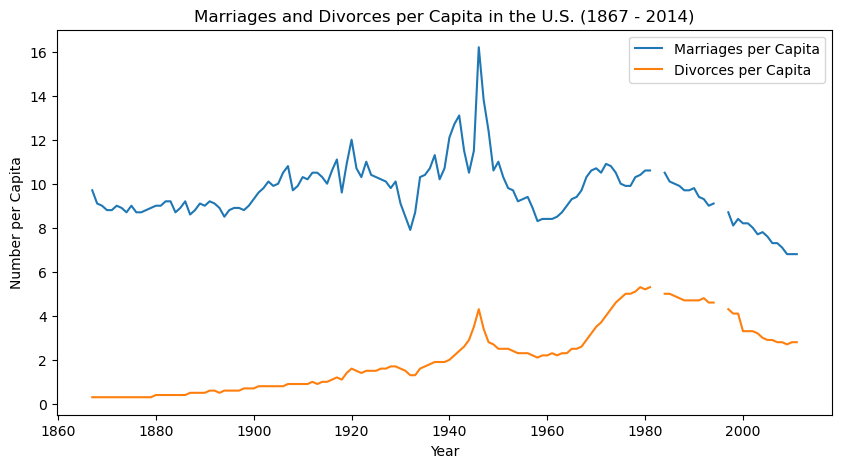

In [15]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per Capita')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per Capita')
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867 - 2014)')
plt.legend()
plt.show()

# Question 7

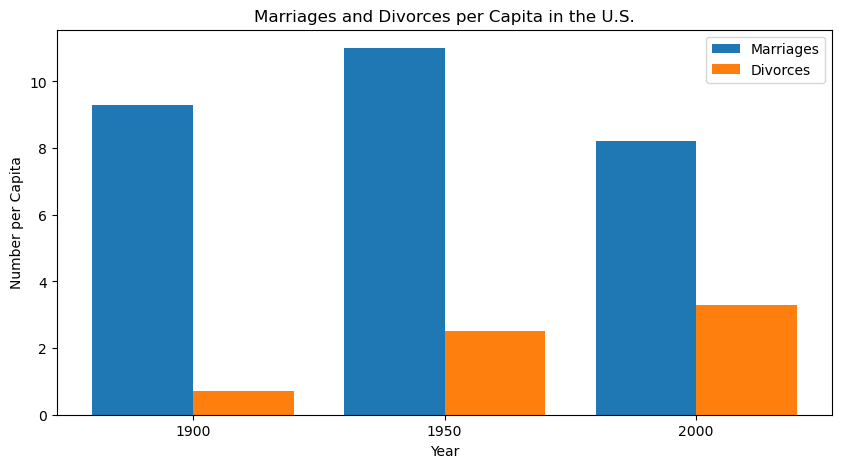

In [14]:
datapath = "C:/Users/mbane/Downloads/us-marriages-divorces-1867-2014.csv"

data = pd.read_csv(datapath)

# Filter the dataset for the years 1900, 1950, and 2000
selected_years = [1900, 1950, 2000]
data_filtered = data[data['Year'].isin(selected_years)]

plt.figure(figsize=(10, 5))
plt.bar(data_filtered['Year'] - 10, data_filtered['Marriages_per_1000'], width=20, label='Marriages', align='center')
plt.bar(data_filtered['Year'] + 10, data_filtered['Divorces_per_1000'], width=20, label='Divorces', align='center')

plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S.')
plt.xticks(selected_years)
plt.legend()
plt.show()

# Question 8

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

datapath2 = "C:/Users/mbane/Downloads/actor_kill_counts.csv"

actors = pd.read_csv(datapath2)

actors.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


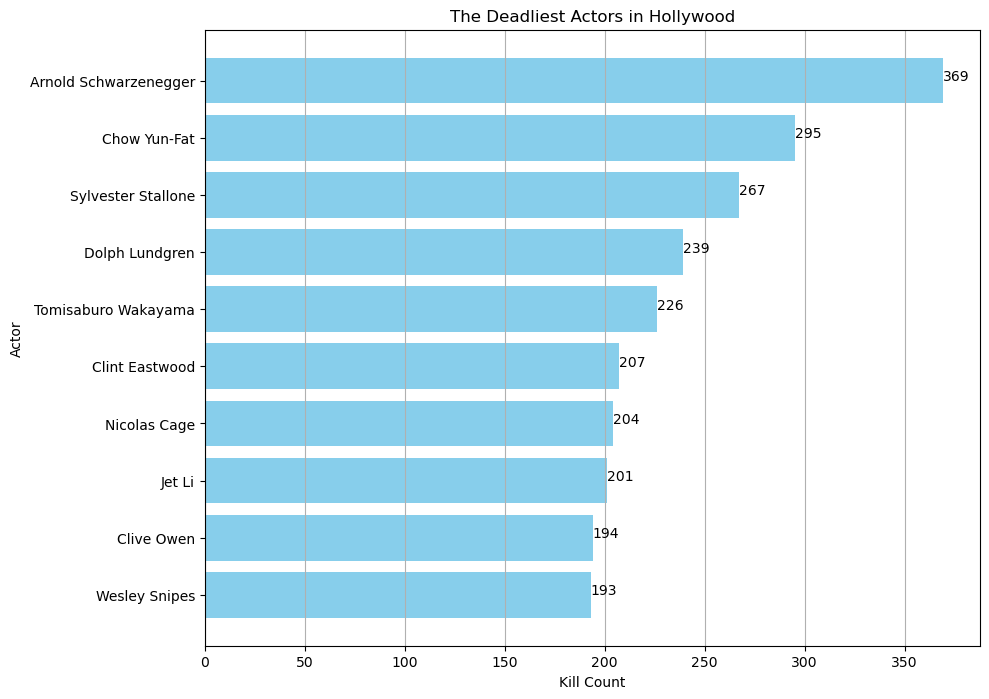

In [19]:
actors_sorted = actors.sort_values('Count', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(actors_sorted['Actor'], actors_sorted['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('The Deadliest Actors in Hollywood')
plt.grid(axis='x')


for index, value in enumerate(actors_sorted['Count']):
    plt.text(value, index, str(value))

plt.show()

# Question 9

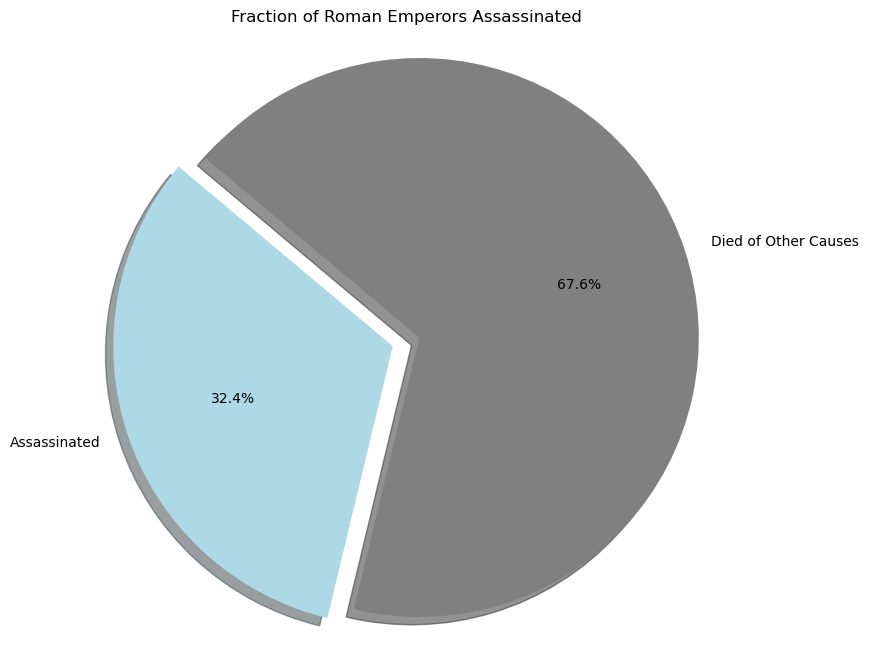

In [20]:
import matplotlib.pyplot as plt

datapath3 = "C:/Users/mbane/Downloads/roman-emperor-reigns.csv"

emperor_data = pd.read_csv(datapath3)

assassinated_count = emperor_data[emperor_data['Cause_of_Death'] == 'Assassinated'].shape[0]
total_emperors = emperor_data.shape[0]
other_causes_count = total_emperors - assassinated_count

labels = 'Assassinated', 'Died of Other Causes'
sizes = [assassinated_count, other_causes_count]
colors = ['lightblue', 'grey']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Fraction of Roman Emperors Assassinated')
plt.show()

# Question 10

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

arcadedatapath = "C:/Users/mbane/Downloads/arcade-revenue-vs-cs-doctorates.csv"

arcade = pd.read_csv(arcadedatapath)

arcade.head()



,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


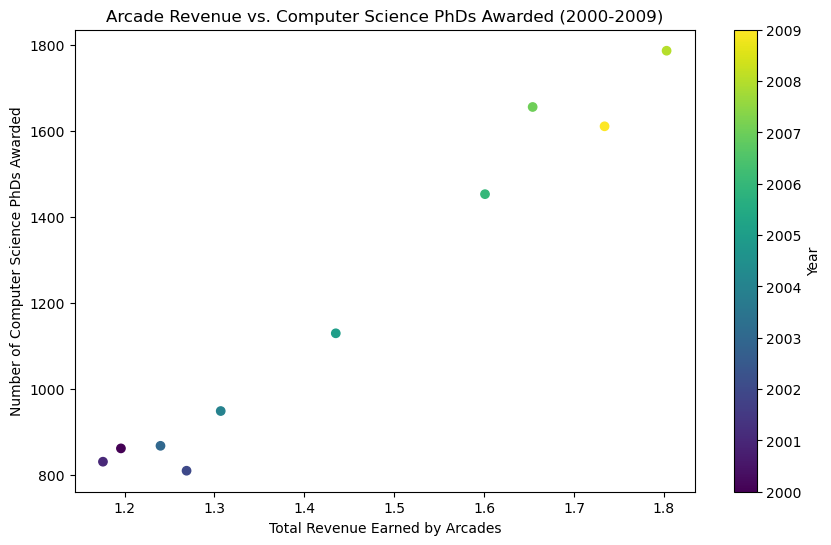

In [22]:
arcade = arcade[(arcade['Year'] >= 2000) & (arcade['Year'] <= 2009)]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(arcade['Total Arcade Revenue (billions)'], arcade['Computer Science Doctorates Awarded (US)'], c=arcade['Year'], cmap='viridis')


plt.xlabel('Total Revenue Earned by Arcades')
plt.ylabel('Number of Computer Science PhDs Awarded')


cbar = plt.colorbar(scatter)
cbar.set_label('Year')


plt.title('Arcade Revenue vs. Computer Science PhDs Awarded (2000-2009)')


plt.show()